In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
def merge(*ll):
    return [[y for x in l for y in x] for l in zip(*ll)]

In [4]:
from data.home import divacrossregul, divacrossrefulv2
l = divacrossregul.l + divacrossrefulv2.l

In [5]:
import numpy as np

In [6]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt


In [7]:
def plot_diversity_reguls():
    plt.rcParams["figure.figsize"] = (10, 10)
    kwargs = dict(alpha=0.5, bins=10, density=True, stacked=True)

    key = "dr"
    keyname = "Feature" if key == "df" else "Prediction"
    colors_reds = cm.Reds(np.linspace(0, 1, 5*5))

    list_methods = ['erm', 'coral', 'fishr', 'gdro', 'mixup']
    for i in range(5):
        for j in range(i, 5):
            mi = list_methods[i]
            mj = list_methods[j]
            lines = [line[key] for line in l if mi in line["dirs"] and mj in line["dirs"]]
            label = mi + "_" + mj + ": " + str(mean(lines))
            plt.hist(lines, **kwargs, color=colors_reds[5*i + j], label=label)

    plt.gca().set(title=keyname + ' diversity across checkpoints', ylabel='Count')
    # plt.xlim(50, 75)
    plt.legend()

In [8]:
def plot_diversity_reguls(l, key="dr", plot=False):
    if plot:
        plt.rcParams["figure.figsize"] = (5, 5)
    kwargs = dict(alpha=0.5, bins=10, density=True, stacked=True)

    keyname = "Feature" if key == "df" else "Prediction"
    colors_reds = cm.Reds(np.linspace(0, 1, 5 * 5))

    mat = [[] for _ in range(len(list_methods))]
    for i in range(5):
        for j in range(i, 5):
            mi = list_methods[i]
            mj = list_methods[j]
            lines = [line[key] for line in l if mi in line["dirs"] and mj in line["dirs"]]
            mean_lines = mean(lines)
            label = mi + "_" + mj + ": " + str(mean_lines)
            if plot:
                plt.hist(lines, **kwargs, color=colors_reds[5 * i + j], label=label)
            mat[i].append(mean_lines)
            if i != j:
                mat[j].append(mean_lines)
    if plot:
        plt.gca().set(title=keyname + ' diversity across checkpoints', ylabel='Count')
        # plt.xlim(50, 75)
        plt.legend()
    return mat


def plot_matrix(mat):
    fig = plt.figure()
    mask = np.ones_like(mat)
    mask[np.tril_indices_from(mask)] = False
    with sns.axes_style("white"):
        ax = sns.heatmap(
            mat,
            mask=mask,
            # vmax=.5,
            square=True,
            cmap="YlGnBu",
            fmt='.3g',
            annot=True,
            xticklabels=list_methods,
            yticklabels=list_methods
        )
    return fig

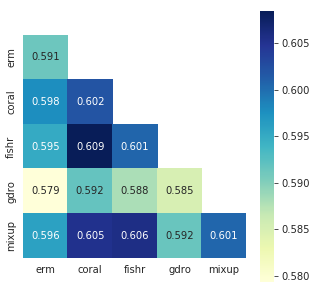

In [50]:
mat = plot_diversity_reguls(l, key="netm")
fig = plot_matrix(mat)

In [51]:

def save_fig(fig, name):
    fig.savefig(
        '/Users/alexandrerame/Documents/deeplearning/writing_publications/soup/figs/' + name,
        format='png',
        dpi=600,
        bbox_inches='tight'
    )

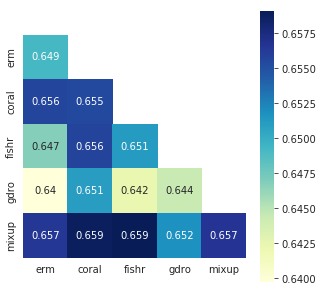

In [52]:
mat = plot_diversity_reguls(l, key="soup")
fig = plot_matrix(mat)

In [56]:
save_fig(fig, "reguls/matrix_acc.png")

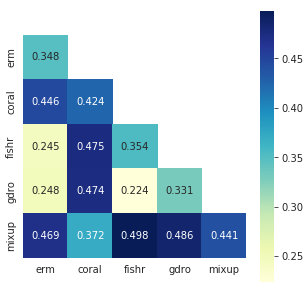

In [57]:
mat = plot_diversity_reguls(l, key="df")
fig = plot_matrix(mat)

In [58]:
save_fig(fig, "reguls/matrix_df.png")

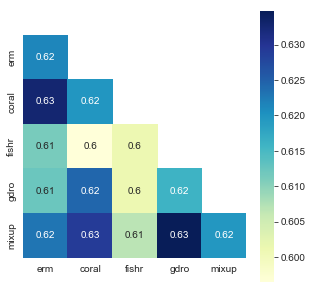

In [34]:
plot_matrix(mat)

In [ ]:
def save_fig(fig, name):
    fig.savefig(
        '/Users/alexandrerame/Documents/deeplearning/writing_publications/soup/figs/' + name,
        format='png',
        dpi=600,
        bbox_inches='tight'
    )

In [ ]:
def get_lower_tri_heatmap(df):
    mask = np.zeros_like(df, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Want diagonal elements as well
    mask[np.diag_indices_from(mask)] = False

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns_plot = sns.heatmap(
        data,
        mask=mask,
        cmap=cmap,
        # vmax=.4,
        # center=0,
        square=True,
        linewidths=.5,
        cbar_kws={"shrink": .5}
    )
    # save to file
    fig = sns_plot.get_figure()
    return fig

In [ ]:
list_methods = ['erm', 'coral', 'fishr', 'gdro', 'mixup']

In [ ]:
ax = sns.heatmap(mat, linewidth=0.5)
plt.show()

In [ ]:
np.triu_indices_from(mask)

In [ ]:
sns.heatmap??

In [ ]:
mask = np.ones_like(mat)
mask[np.tril_indices_from(mask)] = False
with sns.axes_style("white"):
    ax = sns.heatmap(mat, mask=mask, vmax=.5, square=True, cmap="YlGnBu", annot=True, xticklabels=list_methods, yticklabels=list_methods)
    plt.show()

In [ ]:
save_fig(fig, "samediffruns_dp_frequency.png")

In [ ]:
plt.hist(x1, **kwargs, color='g', label='Ideal')
plt.hist(x2, **kwargs, color='b', label='Fair')
plt.hist(x3, **kwargs, color='r', label='Good')
plt.gca().set(title='Frequency Histogram of Diamond Depths', ylabel='Frequency')
plt.xlim(50,75)
plt.legend();

In [ ]:
l_nodrop.l[2] + l_nodrop.l[3]

In [ ]:
swa_nodrop = np.mean([line["df"] for line in l_nodrop.l[2] + l_nodrop.l[3]])

In [ ]:
swa_drop = np.mean([line["df"] for line in l_drop.l[2] + l_drop.l[3]])

In [ ]:
swa_drop

In [ ]:
swa_nodrop

In [ ]:
swa_drop = 

In [ ]:
from codeplot.plot import *

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm

In [ ]:
def fit_and_plot(key1, key2, l, order, label, color):
    if order in [1, "1"]:
        m, b = np.polyfit(get_x(l, key1), get_x(l, key2), 1)
        plt.plot(
            get_x(l, key1),
            m * np.array(get_x(l, key1)) + b,
            color=color,
            label=label + " (slope: " + "{:.0f}".format(m * 1000) + ")"
        )
    elif order in [2, "2"]:
        m2, m1, b = np.polyfit(get_x(l, key1), get_x(l, key2), 2)
        get_x1_sorted = sorted(get_x(l, key1))
        preds = m2 * np.array(get_x1_sorted)**2 + m1 * np.array(get_x1_sorted) + b
        plt.plot(get_x1_sorted, preds, color=color)  # label="int."+label)
    elif order in [3, "3"]:
        m3, m2, m1, b = np.polyfit(get_x(l, key1), get_x(l, key2), 3)
        get_x1_sorted = sorted(get_x(l, key1))
        preds = m3 * np.array(get_x1_sorted)**3 + m2 * np.array(get_x1_sorted)**2 + m1 * np.array(
            get_x1_sorted
        ) + b
        plt.plot(get_x1_sorted, preds, color=color)  # label="int."+label)
    elif order == "2log":
        m2, m1, b = np.polyfit(np.log(get_x(l, key1)), get_x(l, key2), 2)
        get_x1_sorted = np.log(sorted(get_x(l, key1)))
        preds = m2 * np.array(get_x1_sorted)**2 + m1 * np.array(get_x1_sorted) + b
        plt.plot(sorted(get_x(l, key1)), preds, color=color)  # label="int."+label)
    elif order == "3log":
        m3, m2, m1, b = np.polyfit(np.log(get_x(l, key1)), get_x(l, key2), 3)
        get_x1_sorted = np.log(sorted(get_x(l, key1)))
        preds = m3 * np.array(get_x1_sorted)**3 + m2 * np.array(get_x1_sorted)**2 + m1 * np.array(get_x1_sorted) + b
        plt.plot(sorted(get_x(l, key1)), preds, color=color)  # label="int."+label)
    elif order in [0, -1, None, "", "0"]:
        return
    else:
        raise ValueError(order)

In [ ]:
def plot_key(l, key1, key2, order=1, label="", labels=None, diag=False, markers=None, dict_key_to_limit={}):

    plt.xlabel(dict_key_to_label.get(key1, key1))
    plt.ylabel(dict_key_to_label.get(key2, key2))

    def plot_with_int(l, color, label, marker):
        t = get_x(l, key1)
        if t == []:
            return
        if marker is None:
            plt.scatter(get_x(l, key1), get_x(l, key2), color=color, label=(label if order != 1 else None), marker=marker)
        else:
            for xp, yp, m in zip(get_x(l, key1), get_x(l, key2), marker):
                plt.scatter(xp, yp, color=color, marker=m)
        fit_and_plot(key1, key2, l, order, label, color)

    colors = cm.rainbow(np.linspace(0, 1, len(l)))
    if labels is None:
        labels = [label + str(i) for i in range(len(l))]
    for card in range(len(l)):
        if l[card] == []:
            continue
        #print(card, l[card])
        if markers is not None:
            marker = markers[card]
        else:
            marker = None
        plot_with_int(l[card], color=colors[card], label=labels[card], marker=marker)
    if diag:
        xpoints = ypoints = plt.xlim()
        plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False, label="y=x")

    if key1 in dict_key_to_limit:
        plt.xlim(dict_key_to_limit[key1])
    if key2 in dict_key_to_limit:
        plt.ylim(dict_key_to_limit[key2])
    plt.legend()

In [ ]:

def get_x(l, key):
    if "-" in key:
        return [i-j for i, j in zip(get_x(l, key.split("-")[0]), get_x(l, key.split("-")[1]))]
    else:
        return [i[key] for i in l if check_condition(i)]

def check_condition(i):
    if (DROP is not None and i.get("drop", DROP) != DROP):
        return False
    if (STEP is not None and i.get("step", STEP) != STEP):
        return False
    if (TOPK is not None and i.get("topk", TOPK) != TOPK):
        return False
    if ENV is not None and i.get("env", ENV) != ENV:
        return False
    return True


TOPK = None
DROP = None
STEP = None

In [ ]:
dict_key_to_limit = {}

In [ ]:
dr = [67, 123, 156, 175, 202, 225, 271, 283, 296]
df = [64, 114, 153, 154, 155, 155, 175, 183, 189]
m = list(range(2, 11))

In [ ]:
plot_key(l=lsoup, key1="dr", key2="soup", order=1, label="M=")

In [ ]:
plot_key(l=l, key1="3dr", key2="3soup", order=1, label="M=")

In [ ]:
plot_key(l=l, key1="2dr", key2="2soup", order=1, label="M=")

In [ ]:
plot_key(l=l, key1="1dr", key2="1soup", order=1, label="M=")

In [ ]:
plot_key(l=lsoup, key1="df", key2="soup-netm", order=1, label="M=")

In [ ]:
ENV = 1
plot_key(l=lsoup, key1="dr", key2="soup-netm", order=1, label="M=")
plot_key(l=lsoup, key1="df", key2="soup-netm", order=1, label="M=")

In [ ]:
ENV = 2
plot_key(l=lsoup, key1="dr", key2="soup-netm", order=1, label="M=")
plot_key(l=lsoup, key1="df", key2="soup-netm", order=1, label="M=")

In [ ]:
ENV = 3
plot_key(l=lsoup, key1="dr", key2="soup-netm", order=1, label="M=")
plot_key(l=lsoup, key1="df", key2="soup-netm", order=1, label="M=")

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

In [ ]:
DROP=0.
STEP=None
TOPK =-1
plot_key(l=l, key1="df", key2="soup-netm", label="M=", order=1)# diag=1)# dict_key_to_limit={"dr": [0.35, 1.2]})

In [ ]:
DROP=None
STEP=None
TOPK =-1
plot_key(l=lsoup, key1="df", key2="soup", label="M=", order=2)# dict_key_to_limit={"dr": [0.35, 1.2]})

In [ ]:
DROP=None
STEP=None
TOPK =-1
plot_key(l=lsoup, key1="dr", key2="soup", label="M=", order=2)# dict_key_to_limit={"dr": [0.35, 1.2]})

In [ ]:
DROP= None
STEP= 5000
TOPK = None
plot_key(l=lsoup, key1="df", key2="soup", order=2, label="M=")

In [ ]:
TOPK = -1
plot_key(l=lsoup, key1="df", key2="soup-netm", order=1, label="M=")

In [ ]:
dict_key_to_limit = {}

In [ ]:
DROP=None
STEP=5000
plot_key(l=lsoup, key1="df", key2="soup", order=2, label="M=")

In [ ]:
plot_key(l=lsoup, key1="df", key2="netm", order=2, label="M=")

In [ ]:
DROP=-1
STEP=1000
plot_key(l=lsoup, key1="dr", key2="soup-netm", order=1, label="M=")

In [ ]:
DROP=None
STEP=None
plot_key(l=l, key1="dr", key2="soup-netm", order=1, label="M=")

In [ ]:
DROP=None
STEP=None
plot_key(l=lsoup, key1="df", key2="soup-netm", order=1, label="M=")

In [ ]:
dr = [67, 123, 156, 175, 202, 225, 271, 283, 296]
df = [64, 114, 153, 154, 155, 155, 175, 183, 189]
m = list(range(2, 11))


In [ ]:
plt.scatter(m, dr, label="div preds.")
plt.scatter(m, df, label="div feats.")
plt.xlabel("Num networks M")
plt.ylabel("Slope")
plt.legend()

In [ ]:
DROP=None
STEP=None
plot_key(l=lsoup, key1="dr", key2="soup-netm", order=1, label="M=")

In [ ]:
DROP=-1
STEP=3000
plot_key(l=lsoup, key1="dr", key2="soup-netm", order=1, label="swa")

In [ ]:
DROP=-1
STEP=3000
plot_key(l=lsoup, key1="df", key2="soup-netm", order=1, label="swa")

In [ ]:
DROP=0.
STEP=-1
plot_key(l=lsoup, key1="df", key2="soup-netm", order=1, label="swa")

In [ ]:
DROP=0.5
STEP=-1
plot_key(l=lsoup, key1="df", key2="soup-netm", order=1, label="swa")

In [ ]:
DROP=-1
STEP=None
plot_key(l=lsoup, key1="df", key2="soup-netm", order=1, label="swa")

In [ ]:
DROP=-1
STEP=5000
plot_key(l=lsoup, key1="df", key2="soup-netm", order=1, label="swa")

In [ ]:
DROP=0.5
STEP=5000
plot_key(l=lsoup, key1="df", key2="soup-netm", order=1, label="swa")

In [ ]:
labelssoup = ["soup" + str(i) for i in range(len(lsoup))]
labelsswa = ["swa" + str(i) for i in range(len(l))]

In [ ]:
def plot_key_all(l, key1, key2, order=1):

    plt.xlabel(dict_key_to_label.get(key1, key1))
    plt.ylabel(dict_key_to_label.get(key2, key2))

    def plot_with_int(l, color, label):
        t = get_x(l, key1)
        if t == []:
            return
        
        plt.scatter(get_x(l, key1), get_x(l, key2), color=color, label=(label if order != 1 else None))

        if order == 1:
            m, b = np.polyfit(get_x(l, key1), get_x(l, key2), 1)
            plt.plot(get_x(l, key1), m * np.array(get_x(l, key1)) + b, color=color, label=label +": " + "{:.0f}".format(m*1000))
        elif order == 2:
            m2, m1, b = np.polyfit(get_x(l, key1), get_x(l, key2), 2)
            get_x1_sorted = sorted(get_x(l, key1))
            preds = m2 * np.array(get_x1_sorted)**2 + m1 * np.array(get_x1_sorted) + b
            plt.plot(get_x1_sorted, preds, color=color)# label="int."+label)
        elif order == 3:
            m3, m2, m1, b = np.polyfit(get_x(l, key1), get_x(l, key2), 3)
            get_x1_sorted = sorted(get_x(l, key1))
            preds = m3 * np.array(get_x1_sorted)**3 + m2 * np.array(get_x1_sorted)**2 + m1 * np.array(get_x1_sorted) + b
            plt.plot(get_x1_sorted, preds, color=color)# label="int."+label)
        elif order == "2log":
            m2, m1, b = np.polyfit(np.log(get_x(l, key1)), get_x(l, key2), 2)
            get_x1_sorted = np.log(sorted(get_x(l, key1)))
            preds = m2 * np.array(get_x1_sorted)**2 + m1 * np.array(get_x1_sorted) + b
            plt.plot(sorted(get_x(l, key1)), preds, color=color)# label="int."+label)

    all_l = [x for ll in l for x in ll]    
    plot_with_int(all_l, color="blue", label="all")


    plt.legend()

In [ ]:
DROP=None
plot_key(l=l, key1="dr", key2="soup-netm", order=1, label="swa")

In [ ]:
DROP=None
plot_key(l=lsoup, key1="dr", key2="soup-netm", order=1, label="#nets: ")


In [ ]:
DROP=None
plot_key(l=lsoup, key1="df", key2="soup-netm", order=1, label="soup")

In [ ]:
DROP=0.5
plot_key(l=lsoup, key1="dr", key2="thess", order=1)

In [ ]:
DROP=None
plot_key(l=lsoup, key1="dr", key2="thess", order=1)

In [ ]:
plot_key(l=lsoup, key1="df", key2="soup-netm", order=2)

In [ ]:
DROP=0.
plot_key(l=l, key1="dr", key2="soup-netm", order=1)

In [ ]:
DROP=0.
plot_key(l=l, key1="netm", key2="soup", order=1)

In [ ]:
DROP=0.5
plot_key(l=l, key1="netm", key2="soup", order=1)

In [ ]:
DROP=None
plot_key(l=lsoup, key1="df", key2="soup-netm", order=1)

In [ ]:
DROP=0.5
plot_key_all(l=l, key1="dr", key2="netm", order=1)

In [ ]:
DROP=0.5
plot_key(l=l, key1="dr", key2="soup-netm", order=1)

In [ ]:
plot_key(l=lsoup, key1="dr", key2="soup-netm", order=1)

In [ ]:

plot_key(l=lsoup, key1="df", key2="soup-netm", order=1)

In [ ]:
plot_key_all(key1="soup", key2="df", order=1)

In [ ]:
plot_key(l=l, key1="soup", key2="soupswa", order=1, labels=labelssoup, diag=True)

In [ ]:
plot_key(l=lsoup, key1="dr", key2="soup-netm", order=1)

In [ ]:
lsoup[2][0]

In [ ]:
# HP=EoA sometimes dropout
plot_key(l=lsoup, key1="df", key2="soup-netm", order=1)

In [ ]:
# HP=D sans dropout
plot_key(l=lsoup, key1="df", key2="soup-netm", order=1)

In [ ]:
plot_key(l=l, key1="dr", key2="thess", order=1)

In [ ]:
DROP=0.5
plot_key(key1="df", key2="soup", order=1)

In [ ]:
DROP=None
plot_key(l=lsoup, key1="dr", key2="soup-netm", order=1)

In [ ]:
plot_key(l=l, key1="dr", key2="soup-netm", order=1, labels=None)

In [ ]:
plot_key(l=lsoup, key1="net", key2="soup", order=1)

In [ ]:
plot_key(l=l+lsoup, key1="dr", key2="soup-netm", order=1, labels=labels_concat)

In [ ]:
"x"*3

In [ ]:
lconcat = [l[i] + lsoup[i] for i in range(len(l))]


In [ ]:

def plot_markers(l1, l2, key1, key2, order=1, diag=False):

    plt.xlabel(dict_key_to_label.get(key1, key1))
    plt.ylabel(dict_key_to_label.get(key2, key2))

    def plot_without_int(l, color, label, marker):
        t = get_x(l, key1)
        if t == []:
            return
        plt.scatter(get_x(l, key1), get_x(l, key2), color=color, label=label, marker=marker)

    def plot_with_int(l, color):
        if order == 1:
            m, b = np.polyfit(get_x(l, key1), get_x(l, key2), 1)
            plt.plot(get_x(l, key1), m * np.array(get_x(l, key1)) + b, color=color)#, label=label +": " + "{:.0f}".format(m*1000))
        elif order == 2:
            m2, m1, b = np.polyfit(get_x(l, key1), get_x(l, key2), 2)
            get_x1_sorted = sorted(get_x(l, key1))
            preds = m2 * np.array(get_x1_sorted)**2 + m1 * np.array(get_x1_sorted) + b
            plt.plot(get_x1_sorted, preds, color=color)# label="int."+label)
        elif order == 3:
            m3, m2, m1, b = np.polyfit(get_x(l, key1), get_x(l, key2), 3)
            get_x1_sorted = sorted(get_x(l, key1))
            preds = m3 * np.array(get_x1_sorted)**3 + m2 * np.array(get_x1_sorted)**2 + m1 * np.array(get_x1_sorted) + b
            plt.plot(get_x1_sorted, preds, color=color)# label="int."+label)
        elif order == "2log":
            m2, m1, b = np.polyfit(np.log(get_x(l, key1)), get_x(l, key2), 2)
            get_x1_sorted = np.log(sorted(get_x(l, key1)))
            preds = m2 * np.array(get_x1_sorted)**2 + m1 * np.array(get_x1_sorted) + b
            plt.plot(sorted(get_x(l, key1)), preds, color=color)# label="int."+label)

    colors1 = cm.Blues(np.linspace(0, 1, len(l1)))
    colors2 = cm.Reds(np.linspace(0, 1, len(l2)))
    labels1 = ["swa" + str(i) for i in range(len(l1))]
    labels2 = ["soup" + str(i) for i in range(len(l1))]
    for card in range(len(l1)):
        if l1[card] == []:
            continue
        plot_without_int(l1[card], color=colors1[card], label=labels1[card], marker=".")
        plot_with_int(l1[card] + l2[card], color=colors1[card])
    for card in range(len(l2)):
        if l2[card] == []:
            continue
        plot_without_int(l2[card], color=colors2[card], label=labels2[card], marker="*")
    if diag:
        xpoints = ypoints = plt.xlim()
        plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False, label="y=x")

    plt.legend()

In [ ]:
DROP=None
plot_key(l, key1="dr", key2="soup-netm", order=1, diag=False)

In [ ]:
DROP=0.
plot_key(l, key1="df", key2="soup-netm", order=1, diag=False)

In [ ]:
DROP=0.
plot_key(l, key1="dr", key2="soup-netm", order=1, diag=False)

In [ ]:
DROP=0.5
plot_markers(l, lsoup, key1="df", key2="soup-netm", order=1, diag=False)

In [ ]:
DROP=0.5
plot_markers(l, lsoup, key1="df", key2="soup-netm", order=1, diag=False)

In [ ]:
DROP=None
plot_markers(l, lsoup, key1="df", key2="soup-netm", order=1, diag=False)

In [ ]:
DROP=0.
plot_markers(l, lsoup, key1="df", key2="soup-netm", order=1, diag=False)

In [ ]:
DROP=0.
plot_markers(l, lsoup, key1="df", key2="soup", order=1, diag=False)

In [ ]:
DROP=0.
plot_markers(l, lsoup, key1="df", key2="soup-netm", order=1, diag=False)

In [ ]:
markers = ["."*len(l[i]) + "*"*len(lsoup[i]) for i in range(len(l))]
plot_color(l=lconcat, key1="df", key2="soup-netm", order=2, markers=markers)

In [ ]:
markers = ["s"*len(l[i]) + "*"*len(lsoup[i]) for i in range(len(l))]
plot_key(l=lconcat, key1="df", key2="soup-netm", order=2, markers=markers)

In [ ]:
plot_key(l=lconcat, key1="df", key2="soup-netm", order=2)

In [ ]:
DROP=0
plot_key(l=lsoup, key1="dr", key2="soup-netm", order=1)

In [ ]:
DROP=0
plot_key(key1="dr", key2="soup-netm", order=1)

In [ ]:
DROP=0
plot_key(key1="df", key2="soup-netm", order=1)

In [ ]:
DROP=0.
plot_key(key1="df", key2="soup-netm", order=1)

In [ ]:
DROP=0.5
plot_key(key1="df", key2="soup", order=1)

In [ ]:
DROP=0.5
plot_key(key1="df", key2="soup-netm", order=1)

In [ ]:
plot_key(key1="df", key2="soup-netm", order=1)

In [ ]:
plot_key(key1="df", key2="soup-netm", order=1)

In [ ]:
plot_key(key1="df", key2="soup-netm", order=1)

In [ ]:
plot_key(key1="dr", key2="soup-netm", order=1)

In [ ]:
plot_key(key1="df", key2="netm", order=1)

In [ ]:
plot_key(key1="df", key2="netm", order=1)

In [ ]:
plot_key(key1="df", key2="dr", order=1)

In [ ]:
plot_key(key1="df", key2="dr", order=1)

In [ ]:
plot_key(key1="df", key2="netm", order=1)

In [ ]:
plot_key(key1="df", key2="soup-netm", order=1)

In [ ]:
plot_key(key1="df", key2="soup-netm", order=1)

In [ ]:
plot_key(key1="dr", key2="soup-netm", order=1)

In [ ]:
plot_key(key1="dr", key2="soup-netm", order=1)

In [ ]:
plot_key(key1="dr", key2="soup-netm", order=1)

In [ ]:
plot_key(key1="df", key2="soup-netm", order=1)

In [ ]:
plot_key(key1="df", key2="net-netm", order=1)

In [ ]:
plot_key(key1="df", key2="soup-netm", order=1)

In [ ]:
plot_key(key1="df", key2="soup", order=1)

In [ ]:
plot_key(key1="netm", key2="dr", order=1)

In [ ]:
plot_key(key1="netm", key2="dr", order=1)

In [ ]:
plot_key3(key1="netm", key2="soup", order=2, key3="df")

In [ ]:

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

all_l = [x for ll in l[-3:] for x in ll]    
Xi = get_x(all_l, "netm")
Yi = get_x(all_l, "df")
Zi = get_x(all_l, "soup")

In [ ]:
set_xy = set([])
indexes = []
for i, (x, y) in enumerate(zip(Xi, Yi)):
    if (x, y) not in set_xy:
        set_xy.add((x, y))
        indexes.append(i)


Pf = np.array([[Xi[i], Yi[i]] for i in indexes])
Zf = np.array([Zi[i] for i in indexes])
Nf = len(indexes)

In [ ]:
x_mesh = np.linspace(0.55, 0.65, 100)
y_mesh = np.linspace(0.1, 0.2, 100)
X, Y = np.meshgrid(x_mesh, y_mesh)
P = np.array([X.flatten(), Y.flatten() ]).transpose()

In [ ]:
from scipy.interpolate import griddata
Z_cubic = griddata(Pf, Zf, P, method = "cubic").reshape([100, 100])

In [ ]:
Z_nearest = griddata(Pf, Zf, P, method = "cubic").reshape([100, 100])
plt.contourf(X, Y, Z_nearest, 50)
plt.plot(Xi, Yi, "or", label = "Data")
plt.colorbar()
plt.legend()
plt.grid()
plt.show()

In [ ]:
plot_key3(key1="netm", key2="df", key3="soup", order=1)

In [ ]:
def plot_key3(key1, key2, key3=None, order=1):

    plt.xlabel(dict_key_to_label.get(key1, key1))
    plt.ylabel(dict_key_to_label.get(key2, key2))

    def plot_with_int(l, label, key3=None, order=None):
        t = get_x(l, key1)
        if t == []:
            return
        if key3:
            c = get_x(l, key3)
            cmap = plt.cm.get_cmap("Reds", 6)

        if order == 1:
            m, b = np.polyfit(get_x(l, key1), get_x(l, key2), 1)
            plt.plot(get_x(l, key1), m * np.array(get_x(l, key1)) + b, label=label +": " + "{:.0f}".format(m*1000))
            if key3:
                plt.scatter(get_x(l, key1), get_x(l, key2), c=c, cmap=cmap)

        elif order == 2:
            m2, m1, b = np.polyfit(x(l, key1), x(l, key2), 2)
            x1_sorted = sorted(x(l, key1))
            preds = m2 * np.array(x1_sorted)**2 + m1 * np.array(x1_sorted) + b
            plt.plot(x1_sorted, preds, label=label)# label="int."+label)
            if key3:
                plt.scatter(x(l, key1), x(l, key2), c=c, cmap=cmap)

    for card in range(9, 11):
        plot_with_int(l[card], label="swa" + str(card), order=0)

    plot_with_int([x for card in range(1, 10) for x in l[card]], label="all", key3=key3, order=order)
    cbar = plt.colorbar()
    cbar.set_label(dict_key_to_label.get(key3, key3))
    plt.legend()

In [ ]:
def plot_key_mash(key1, key2, key3=None, order=1):

    plt.xlabel(dict_key_to_label.get(key1, key1))
    plt.ylabel(dict_key_to_label.get(key2, key2))

    def plot_with_int(l, label, order=None):
        t = x(l, key1)
        if t == []:
            return

        if order == 1:
            m, b = np.polyfit(x(l, key1), x(l, key2), 1)
            plt.plot(x(l, key1), m * np.array(x(l, key1)) + b, label=label +": " + "{:.0f}".format(m*1000))

        elif order == 2:
            m2, m1, b = np.polyfit(x(l, key1), x(l, key2), 2)
            x1_sorted = sorted(x(l, key1))
            preds = m2 * np.array(x1_sorted)**2 + m1 * np.array(x1_sorted) + b
            plt.plot(x1_sorted, preds, label=label)# label="int."+label)

    for card in range(8, 11):
        plot_with_int(l[card], label="swa" + str(card), order=0)

    all_l = [x for ll in l for x in ll]    
    z = x(all_l, key3)
    z_min, z_max = -np.abs(z).max(), np.abs(z).max()
    
    plt.pcolormesh(x(all_l, key1), x(all_l, key2), z, cmap='RdBu', vmin=z_min, vmax=z_max)
    #ax.set_title('pcolormesh')
    #cbar.set_label(dict_key_to_label.get(key3, key3))
    plt.legend()

In [ ]:
def plot_key_swa(key1, keys2, order=1):


    plt.xlabel(dict_key_to_label.get(key1, key1))

    def plot_with_int(l, color, label, key2):
        
        t = x(l, key1)
        if t == []:
            return
        if order == 1:
            m, b = np.polyfit(x(l, key1), x(l, key2), 1)
            plt.plot(x(l, key1), m * np.array(x(l, key1)) + b, color=color, label=label +": " + "{:.3f}".format(m*1000))
            plt.scatter(x(l, key1), x(l, key2), color=color)
        elif order == 2:
            m2, m1, b = np.polyfit(x(l, key1), x(l, key2), 2)
            x1_sorted = sorted(x(l, key1))
            preds = m2 * np.array(x1_sorted)**2 + m1 * np.array(x1_sorted) + b
            plt.plot(x1_sorted, preds, color=color)# label="int."+label)
            plt.scatter(x(l, key1), x(l, key2), color=color, label=label)
        elif order == 3:
            m3, m2, m1, b = np.polyfit(x(l, key1), x(l, key2), 3)
            x1_sorted = sorted(x(l, key1))
            preds = m3 * np.array(x1_sorted)**3 + m2 * np.array(x1_sorted)**2 + m1 * np.array(x1_sorted) + b
            plt.plot(x1_sorted, preds, color=color)# label="int."+label)
            plt.scatter(x(l, key1), x(l, key2), color=color, label=label)
        elif order == "2log":
            m2, m1, b = np.polyfit(np.log(x(l, key1)), x(l, key2), 2)
            x1_sorted = np.log(sorted(x(l, key1)))
            preds = m2 * np.array(x1_sorted)**2 + m1 * np.array(x1_sorted) + b
            plt.plot(sorted(x(l, key1)), preds, color=color)# label="int."+label)
            plt.scatter(x(l, key1), x(l, key2), color=color, label=label)
    colors = ["blue", "yellow"]
    #plot_with_int(l0, color="grey", key2="soup", label="swa")
    for  key2, color in zip(keys2, colors[:len(keys2)]):
        plot_with_int(l2, key2=key2, color=color, label=key2)

    plt.legend()